In [2]:
##Importamos librerias 

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("CSV/data_limpia_1.csv", index_col=0)

df.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
4,no,non travel,unknown,technical degree,F,sales executive,no,no,46,3,3,5,1,4,4,1,12783.92,33238.20,2,12,3,4,1,5,3,19,2,8,153407.04


In [4]:
df.shape


(1614, 29)

## Funciones

In [24]:
## Normalidad de los datos: 
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [23]:
## MW: 

def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "campaign_name"):

    """
    Realiza la prueba de Mann-Whitney U para comparar las medianas de las métricas entre dos grupos en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columnas_metricas (list): Una lista de nombres de columnas que representan las métricas a comparar entre los grupos.
    - grupo_control (str): El nombre del grupo de control en la columna especificada por columna_grupos.
    - grupo_test (str): El nombre del grupo de test en la columna especificada por columna_grupos.
    - columna_grupos (str): El nombre de la columna que contiene la información de los grupos. Por defecto, "campaign_name".

    Returns 
    No devuelve nada directamente, pero imprime en la consola si las medianas son diferentes o iguales para cada métrica.
    Se utiliza la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos.
    """
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    
    # iteramos por las columnas de las metricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        
        # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]
        
        # aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes.")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales.")            
    

## Exploración por columnas: 

### ATTRITION VS SATISFACTION

Hipótesis: "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".

In [7]:
#Dividimos a los empleados según nivel de satisfacción: 
grupo_a= df[df['jobsatisfaction'] >= 3]
grupo_b = df[df['jobsatisfaction'] < 3]

In [8]:
grupo_a.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
5,no,non travel,research & development,medical,F,manager,no,yes,48,22,3,6,1,3,4,4,14311.67,37210.33,3,11,3,2,1,3,3,22,4,7,171740.04


In [9]:
grupo_a["attrition"].value_counts()

attrition
no     859
yes    136
Name: count, dtype: int64

In [9]:
## 1: Chequeamos tasa de abandono de ambos grupos: 

abandono_grupo_a = {"grupo": ["Abandono","Empleados actuales"], "valores": [136,859]}
df_abandono_grupo_a = pd.DataFrame(abandono_grupo_a)
df_abandono_grupo_a

,grupo,valores
0,Abandono,136
1,Empleados actuales,859


In [10]:
grupo_b['attrition'].value_counts()

attrition
no     496
yes    123
Name: count, dtype: int64

In [11]:
abandono_grupo_b = {"grupo": ["Abandono","Empleados actuales"], "valores": [123,496]}
df_abandono_grupo_b = pd.DataFrame(abandono_grupo_b)
df_abandono_grupo_b

,grupo,valores
0,Abandono,123
1,Empleados actuales,496


In [12]:
# Cálculo de la tasa de rotación

# Tasa de attrition en grupo A
df_grupoa_attrition = grupo_a[grupo_a["attrition"] == "yes"]
tasa_attrition_grupoa = round(df_grupoa_attrition.shape[0] / grupo_a.shape[0],2)
print(f"la tasa de attrition del grupo A es: {tasa_attrition_grupoa}")

# Tasa de attrition en grupo B
df_grupob_attrition = grupo_b[grupo_b["attrition"] == "yes"]
tasa_attrition_grupob = round(df_grupob_attrition.shape[0] / grupo_b.shape[0],2)
print(f"la tasa de attrition del grupo B es: {tasa_attrition_grupob}")

la tasa de attrition del grupo A es: 0.14
la tasa de attrition del grupo B es: 0.2


In [13]:

# Número de empleados que abandonaron y no abandonaron en Grupo A
abandono_a = df_grupoa_attrition.shape[0]  # Empleados que abandonaron
no_abandono_a = grupo_a[grupo_a["attrition"] == "no"].shape[0]  # Empleados que no abandonaron

# Número de empleados que abandonaron y no abandonaron en Grupo B
abandono_b = df_grupob_attrition.shape[0]  # Empleados que abandonaron
no_abandono_b = grupo_b[grupo_b["attrition"] == "no"].shape[0]  # Empleados que no abandonaron

In [13]:
##    3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B. 

In [14]:
# Crear tabla de contingencia con los valores absolutos
contingency_table = [
    [abandono_a, no_abandono_a],  # Grupo A: Abandonaron, No Abandonaron
    [abandono_b, no_abandono_b]   # Grupo B: Abandonaron, No Abandonaron
]

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("")
    print("Hay una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("")
    print("""Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas")

0.0012322848438575645

Hay una diferencia significativa en la tasa de rotación de ambos grupos.

Los resultados sugieren que si que existe una diferencia entre los grupos 
          


In [38]:
#Graficos para mostrar diferencias entre grupos: 

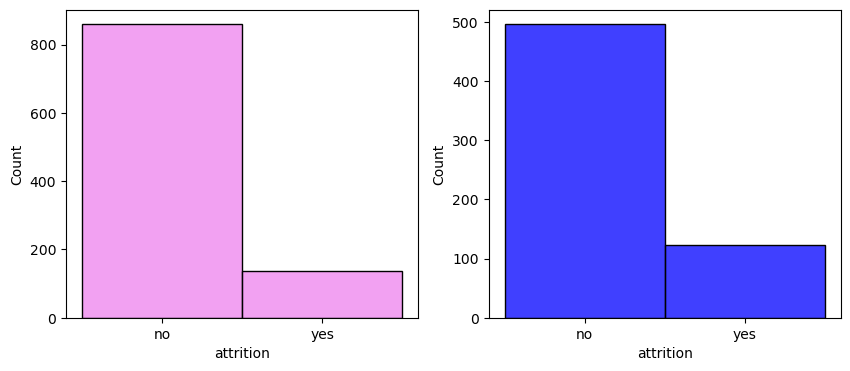

In [64]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

sns.histplot(x = "attrition", data = grupo_a, color = "violet", ax = axes[0]); #subplot para meter grupo a

sns.histplot(x = "attrition", data = grupo_b, color = "blue", ax = axes[1]); #subplot para meter grupo b

<Axes: xlabel='attrition', ylabel='jobsatisfaction'>

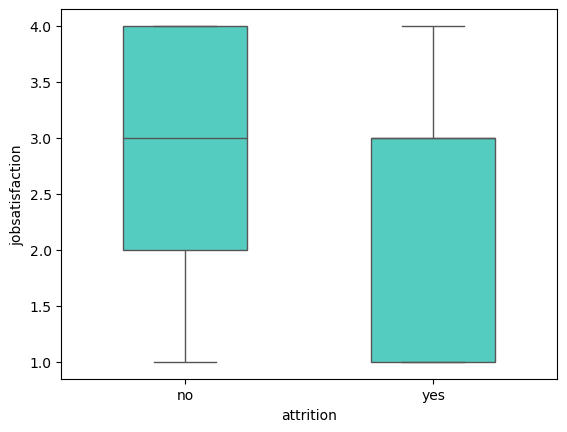

In [21]:

sns.boxplot(data=df, 
            y='jobsatisfaction',
            x='attrition',
            width = 0.5, 
            color = "turquoise", 
            )

### SALARY VS SATISFACTION

In [ ]:
## Calculamos salario medio: 

In [81]:
df.groupby('jobsatisfaction')['salary'].mean() 

jobsatisfaction
1    66263.992303
2    65111.057980
3    64761.926840
4    66225.699222
Name: salary, dtype: float64

In [ ]:
## Verificamos si los datos son normales o no: 

In [82]:
normalidad(df,'salary')

Para la columna salary los datos no siguen una distribución normal.


In [90]:
grupocontrol = df[df['jobsatisfaction'] >= 3]['salary']
grupotest = df[df['jobsatisfaction'] < 3]['salary']

In [91]:
## Los datos No son normales > entonces hacemos Mann whitney: 

mannwhitneyu(grupocontrol,grupotest)

MannwhitneyuResult(statistic=305126.5, pvalue=0.7552997798403821)

In [ ]:
_, p_value_salary = mannwhitneyu(grupocontrol,grupotest)_, p_value_salary = mannwhitneyu(grupocontrol,grupotest)

In [96]:
p_value_salary

0.7552997798403821

In [97]:
p_value_salary < 0.05

False

In [ ]:
# si p_value < 0.05 -> existe una diferencia significativa 
# si p_value > 0.05 -> no hay diferencia significativa

In [ ]:
## Conclusión: No se puede afirmar que exista una diferencia estadísticamente significativa.

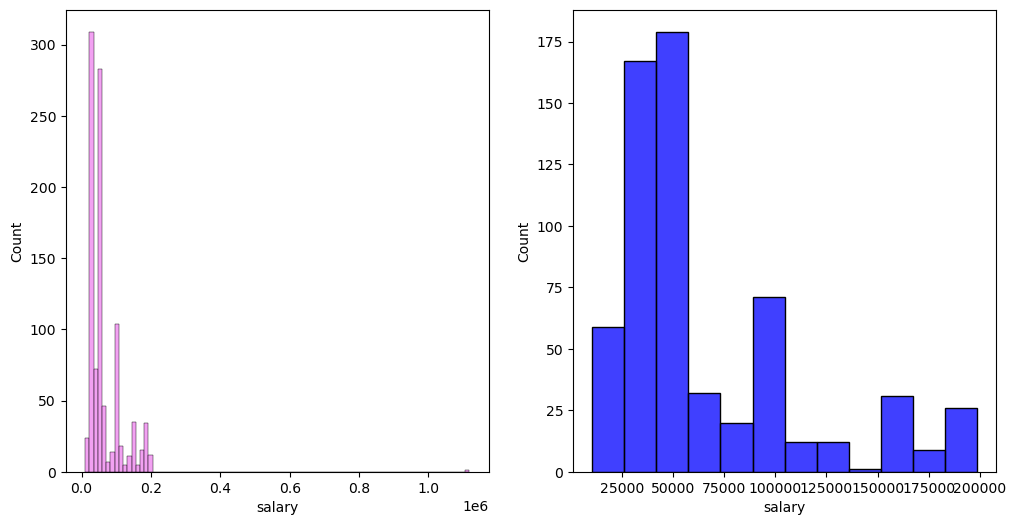

In [151]:
## Graficos Salary: **** Ver como arreglar rango eje X ****

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.histplot(x = "salary", data = grupo_a, color = "violet", ax = axes[0]); #subplot para meter grupo a

sns.histplot(x = "salary", data = grupo_b, color = "blue", ax = axes[1]); #subplot para meter grupo b

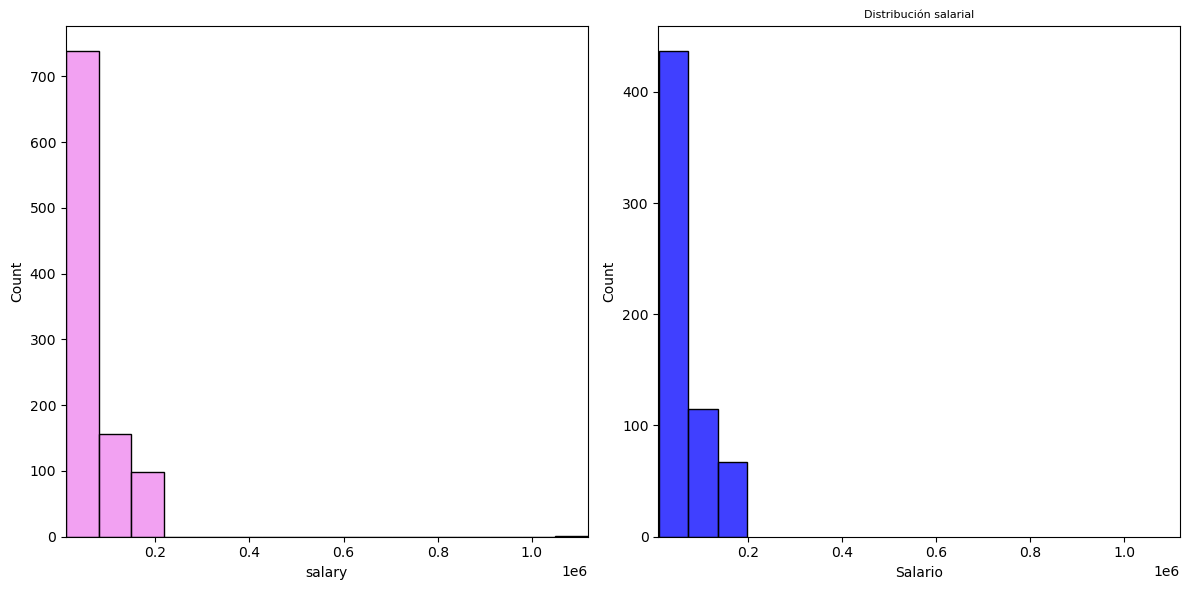

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Ajustar el ancho de las barras (bins) 

bin_width = 70000  # Cambia este valor según el rango de los datos

# Histogramas para cada grupo 

sns.histplot(x="salary", data=grupo_a, color="violet", binwidth=bin_width, ax=axes[0]) 
sns.histplot(x="salary", data=grupo_b, color="blue", binwidth=bin_width, ax=axes[1])

# Establecer el mismo rango para el eje X en ambos gráficos
min_salary = min(grupo_a["salary"].min(), grupo_b["salary"].min())
max_salary = max(grupo_a["salary"].max(), grupo_b["salary"].max())

axes[0].set_xlim(min_salary, max_salary)  # Para el primer subplot
axes[1].set_xlim(min_salary, max_salary)  # Para el segundo subplot

# ponemos los nombres de los ejes
plt.xlabel("Salario")

# ponemos un título usando el método 'plt.title()'
# en este caso lo que hemos añadido es al parámetro 'fontsize' que nos permite cambiar el tamaño del título
plt.title("Distribución salarial", fontsize = 8);

# Mostrar los gráficos
plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()

/tmp/ipykernel_3626/4240077436.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobsatisfaction", y="salary", data=df, ci=None)


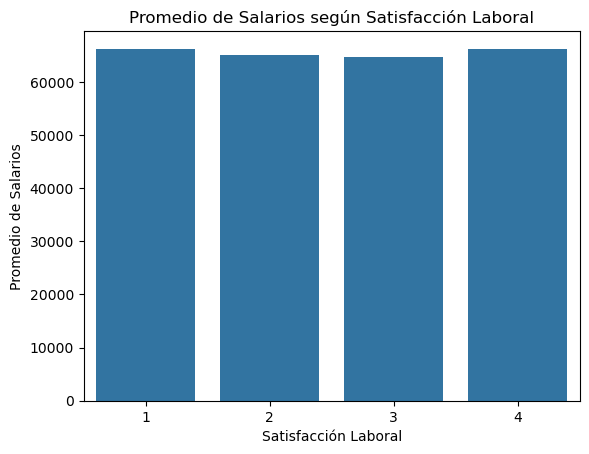

In [153]:
sns.barplot(x = "jobsatisfaction", y="salary", data=df, ci=None)
            
plt.title("Promedio de Salarios según Satisfacción Laboral")
plt.xlabel("Satisfacción Laboral")
plt.ylabel("Promedio de Salarios"); ## Comparamos el jobsatisfaction vs salario (de todos los empleados)

### GÉNERO VS SATISFACCIÓN

In [101]:
df['gender'].value_counts()

gender
M    971
F    643
Name: count, dtype: int64

In [103]:
pd.crosstab(grupo_a['jobsatisfaction'], grupo_a['gender'])

gender,F,M
jobsatisfaction,,
3,198,283
4,185,329


In [104]:
#GENERO VS SATISFACCION 

pd.crosstab(grupo_b['jobsatisfaction'], grupo_b['gender'])

gender,F,M
jobsatisfaction,,
1,130,187
2,130,172


In [154]:
contingency_table_genero = pd.crosstab(df['jobsatisfaction'],df['gender'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table_genero)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("")
    print("Hay una diferencia significativa entre ambos grupos.")
    print("")
    print("""Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa entre ambos grupos.")
    print("Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas")

0.1715517080906658
No hay evidencia de una diferencia significativa entre ambos grupos.
Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas


Text(0.5, 0, 'Nivel de Satisfacción Laboral')

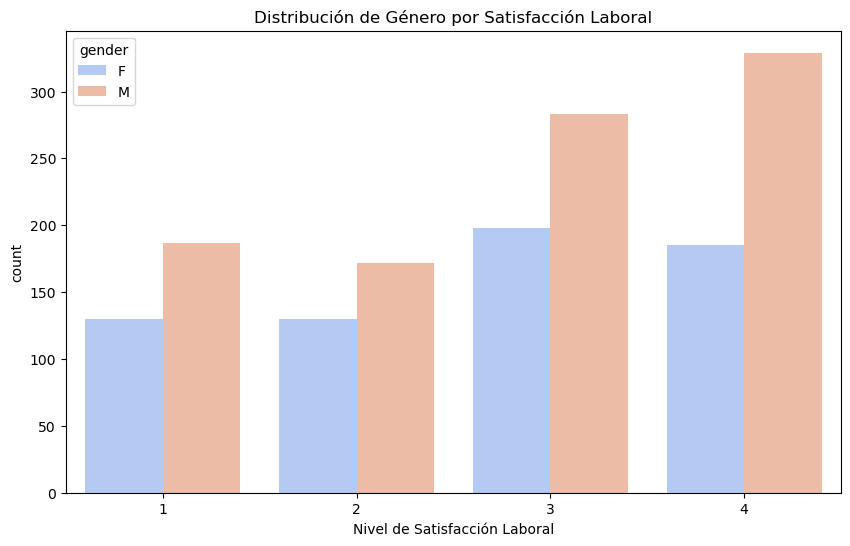

In [161]:
plt.figure(figsize=(10,6))

sns.countplot(x="jobsatisfaction", hue="gender", data=df, dodge=True, palette="coolwarm")

# Añadir título y etiquetas
plt.title("Distribución de Género por Satisfacción Laboral")
plt.xlabel("Nivel de Satisfacción Laboral")


In [ ]:
## Conclusión: No se puede afirmar que exista una diferencia estadísticamente significativa.

### YEARS AT COMPANY VS SATISFACTION

In [282]:
pd.crosstab(df['jobsatisfaction'], df['yearsatcompany']) ## Crosstable

yearsatcompany,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,36,37,40
jobsatisfaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12,31,21,32,29,40,13,28,14,19,24,3,2,8,4,6,2,1,6,3,4,4,1,0,2,1,2,0,1,0,1,0,0,1,2,0,0
2,5,39,23,25,21,39,14,15,29,20,20,11,2,6,1,3,3,1,0,3,4,2,6,0,2,2,1,0,1,0,1,1,2,0,0,0,0
3,16,48,48,45,32,67,15,29,45,17,40,7,4,5,5,6,5,4,5,5,14,3,6,2,0,0,0,3,0,1,1,0,2,0,0,1,0
4,11,53,49,39,32,62,36,43,18,38,49,15,7,7,9,6,4,3,4,1,7,5,4,0,3,2,1,0,0,0,0,2,1,0,1,0,2


In [190]:
normalidad(df,'yearsatcompany')

Para la columna yearsatcompany los datos no siguen una distribución normal.


In [191]:
grupocontrol_yac = df[df['jobsatisfaction'] >= 3]['yearsatcompany']
grupotest_yac = df[df['jobsatisfaction'] < 3]['yearsatcompany']

In [193]:
_, p_value_yac = mannwhitneyu(grupocontrol_yac,grupotest_yac)

In [194]:
p_value_yac < 0.05

False

In [ ]:
## Conclusión: No se puede afirmar que exista una diferencia estadísticamente significativa.

In [ ]:
### OTRAS PRUEBAS AB TESTING: 

In [236]:
df.columns

Index(['attrition', 'businesstravel', 'department', 'educationfield', 'gender',
       'jobrole', 'overtime', 'remotework', 'age', 'distancefromhome',
       'education', 'employeenumber', 'environmentsatisfaction',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'salary'],
      dtype='object')

In [276]:
pd.crosstab(df['jobsatisfaction'],df['stockoptionlevel'])

stockoptionlevel,0,1,2,3
jobsatisfaction,,,,
1,134,136,28,19
2,130,123,31,18
3,210,199,50,22
4,213,208,63,30


In [277]:
normalidad(df, 'stockoptionlevel')

Para la columna stockoptionlevel los datos no siguen una distribución normal.


In [278]:
grupo1 = df[df['jobsatisfaction'] >= 3]['stockoptionlevel']
grupo2 = df[df['jobsatisfaction'] < 3]['stockoptionlevel']

In [279]:
_, p_value_1 = mannwhitneyu(grupo1,grupo2)

In [280]:
p_value_1 < 0.05

False

In [281]:
contingency_table_enviroment = pd.crosstab(df['jobsatisfaction'],df['stockoptionlevel'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table_enviroment)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("")
    print("Hay una diferencia significativa entre ambos grupos.")
    print("")
    print("""Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa entre ambos grupos.")
    print("Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas")

0.9096276830404566
No hay evidencia de una diferencia significativa entre ambos grupos.
Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas


In [ ]:
### FIN PRUEBAS. 

## Exploración general: 

/tmp/ipykernel_25855/2605322453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grupo", y="valores", data=abandono_grupo_a, palette="mako");


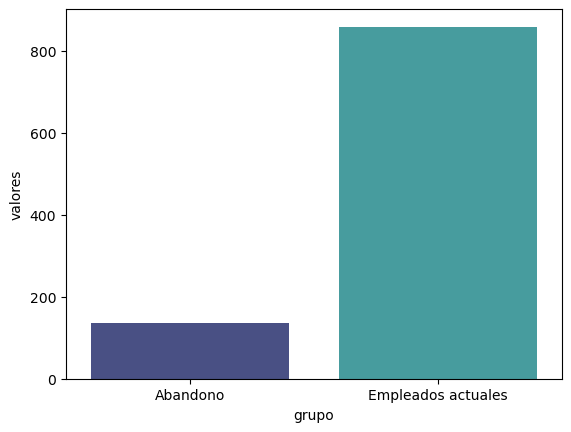

In [ ]:
sns.barplot(x="grupo", y="valores", data=abandono_grupo_a, palette="mako");

In [ ]:
## Chequeamos tasa de abandono en relación al género (empleados satisfechos)

<Axes: xlabel='gender', ylabel='Count'>

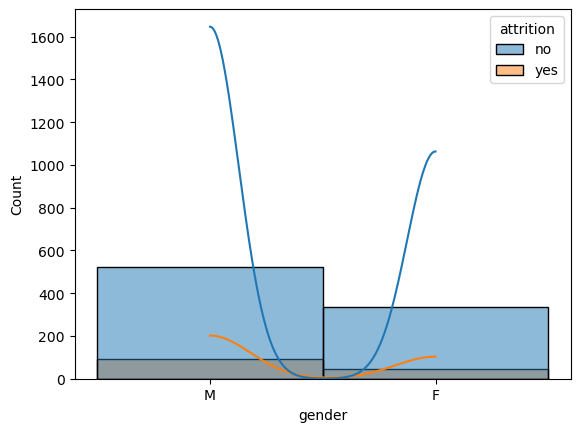

In [ ]:
sns.histplot(data = grupo_a, x = "gender", hue = "attrition", kde = True, color= "blue")
# plt.title("Género según rotación")
# plt.xlabel("Género")
# plt.ylabel("Frecuencia")

In [ ]:
pd.crosstab(grupo_a["attrition"], grupo_a["gender"], normalize="columns")*100 ## porcentaje de abandono por género

gender,F,M
attrition,,
no,87.989556,85.294118
yes,12.010444,14.705882


In [ ]:
## Función para ver si los datos son normales: 

def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [ ]:
normalidad(grupo_a, 'age')

Para la columna age los datos no siguen una distribución normal.


<Axes: xlabel='salary', ylabel='attrition'>

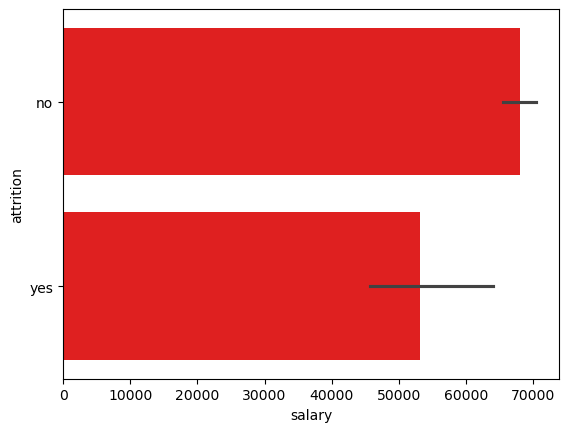

In [ ]:
sns.barplot(data = df, x = "salary", y="attrition", color= "red")

In [ ]:
normalidad(df,"salary")

Para la columna salary los datos no siguen una distribución normal.


In [ ]:
mannwhitneyu()